# **Regression Model**

### **Afhankelijke variabele**

##### Relevantie:
Tekst...

##### Inschatting van Bijpassende Onafhankelijke Variabelen:
**Onafhankelijke variabele1:** Tekst...

In [10]:
import pandas as pd
import warnings
import numpy as np
import sqlite3
from loguru import logger
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

In [11]:
# SQLite Connecties
logger.info('Establishing connection with SQLite databases...')
conn = sqlite3.connect('../../data/processed/United_Outdoors.sqlite3')
logger.success('Connections established!')

# Connect to the SQLite database
cursor = conn.cursor()

2024-05-28 10:42:56.425 | INFO     | __main__:<module>:2 - Establishing connection with SQLite databases...
2024-05-28 10:42:56.426 | SUCCESS  | __main__:<module>:4 - Connections established!


In [12]:
order = pd.read_sql_query('SELECT SalesOrderID, OrderQty, UnitPrice, UnitPriceDiscount, LineTotal, CustomerID_AW, ProductID_AW, Freight, SubTotal, TaxAmt, ShipMethodID, OrderDate FROM Order_Details', conn)

order = order.rename(columns={'OrderQty': 'Quantity'})

order['OrderDate'] = pd.to_datetime(order['OrderDate'])
order['Year'] = order['OrderDate'].dt.year
order['Month'] = order['OrderDate'].dt.month
order['Day'] = order['OrderDate'].dt.day

order = order.drop(columns=['OrderDate'], axis=1)

order = pd.get_dummies(order, columns=['Year', 'Month', 'Day'])

order.fillna(order.mean(), inplace=True)
order.fillna(order.mode().iloc[0], inplace=True)


In [13]:
X = order.drop(columns=['Quantity'])
y = order['Quantity']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42
)

In [14]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [15]:
y_pred = reg_model.predict(X_test)
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns={0: 'Predicted Quantity'})
y_test_prediction_merge = pd.concat([y_test.reset_index()['Quantity'], prediction_df], axis=1)
y_test_prediction_merge['Predicted Quantity'] = np.where(y_test_prediction_merge['Predicted Quantity'] < 0, 1, y_test_prediction_merge['Predicted Quantity'])

y_test_prediction_merge

,Quantity,Predicted Quantity
0,4.0,5.514683
1,1.0,1.510759
2,1.0,0.372524
3,6.0,7.841568
4,1.0,1.450332
...,...,...
18614,1.0,2.917380
18615,1.0,1.285539
18616,1.0,0.872784
18617,1.0,1.466072


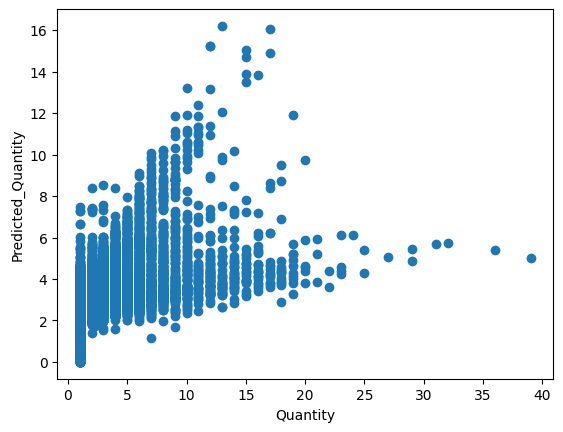

In [16]:
plt.scatter(y_test_prediction_merge['Quantity'], y_test_prediction_merge['Predicted Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Predicted_Quantity')
plt.show()

In [17]:
mean_squared_error(y_test_prediction_merge['Quantity'], y_test_prediction_merge['Predicted Quantity'])

3.539214938508568

In [18]:
mean_absolute_error(y_test_prediction_merge['Quantity'], y_test_prediction_merge['Predicted Quantity'])

0.9712987067220288